# Brain Stroke Prediction

## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #creating static, interactive, and animated visualizations in Python
import seaborn as sns #data visualizations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

import warnings
warnings.filterwarnings('ignore')

### Viewing the data in pandas

In [2]:
#The dataframe is read from the csv file
df=pd.read_csv('brain_stroke.csv')
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [3]:
df.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [4]:
#Count of number of records and columns
df.shape

(4981, 11)

In [5]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
# Checking the values in the stroke column
print(df["stroke"].value_counts())

0    4733
1     248
Name: stroke, dtype: int64


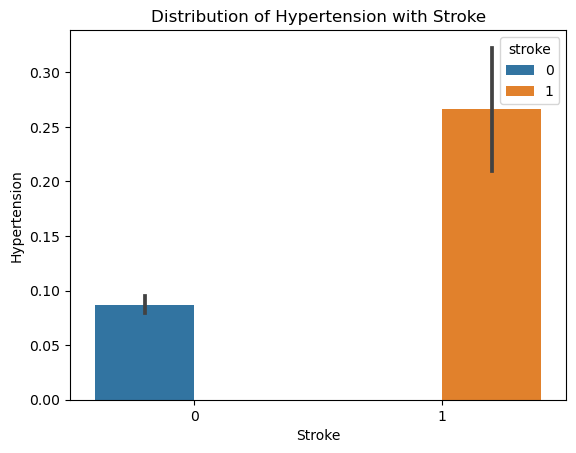

In [9]:
sns.barplot(x="stroke", y='hypertension', data=df, hue="stroke")
#label axis
plt.xlabel("Stroke")
plt.ylabel("Hypertension")
plt.title("Distribution of Hypertension with Stroke");

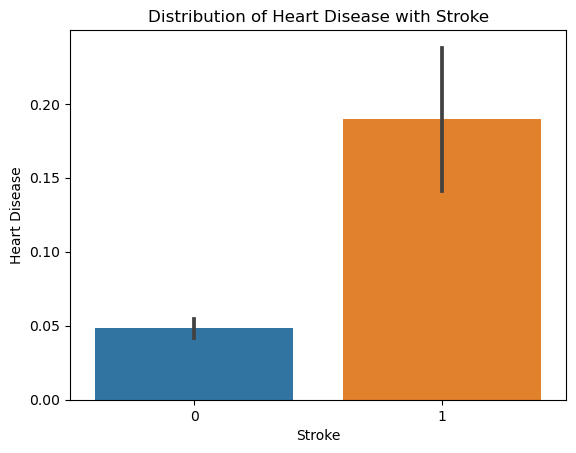

In [10]:
sns.barplot(x="stroke", y='heart_disease', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("Heart Disease")
plt.title("Distribution of Heart Disease with Stroke");

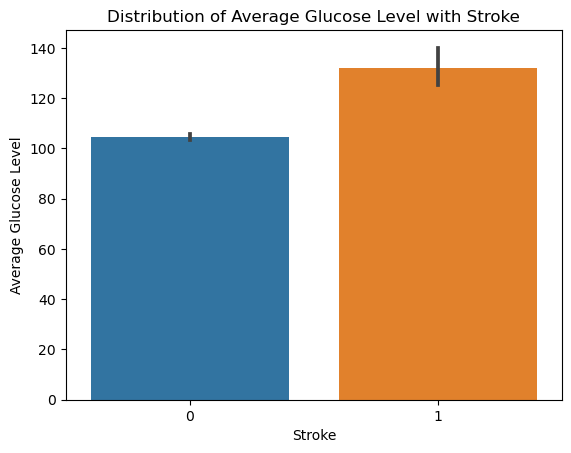

In [11]:
sns.barplot(x="stroke", y='avg_glucose_level', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("Average Glucose Level")
plt.title("Distribution of Average Glucose Level with Stroke");

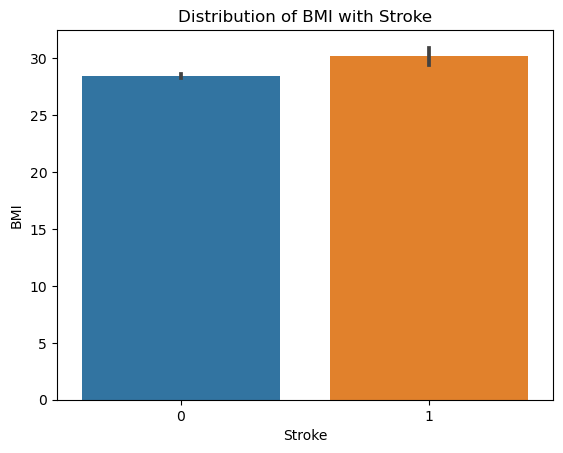

In [12]:
sns.barplot(x="stroke", y='bmi', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("BMI")
plt.title("Distribution of BMI with Stroke");

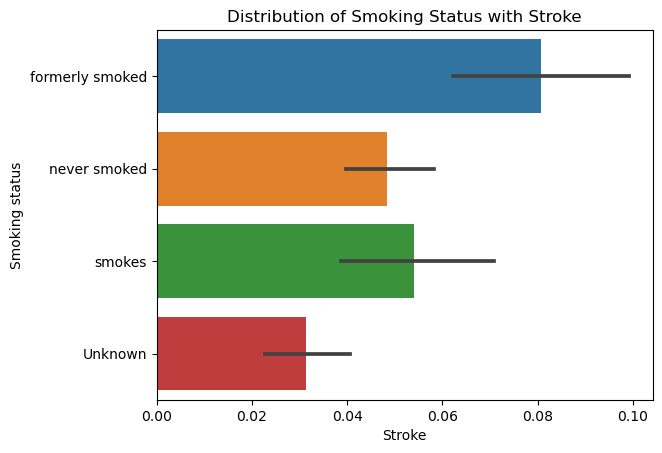

In [13]:
sns.barplot(x="stroke", y='smoking_status', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("Smoking status")
plt.title("Distribution of Smoking Status with Stroke");

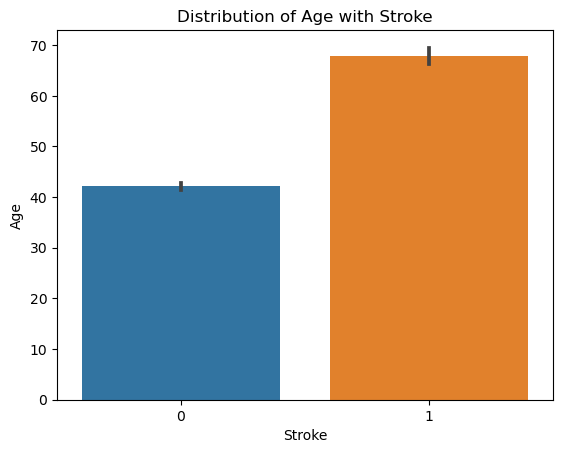

In [14]:
sns.barplot(x="stroke", y='age', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("Age")
plt.title("Distribution of Age with Stroke");

In [15]:
print(df["smoking_status"].value_counts())

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


In [16]:
print(df["heart_disease"].value_counts())

0    4706
1     275
Name: heart_disease, dtype: int64


In [17]:
# Exluding the object datatype in the dataset
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   heart_disease      4981 non-null   int64  
 3   avg_glucose_level  4981 non-null   float64
 4   bmi                4981 non-null   float64
 5   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 233.6 KB


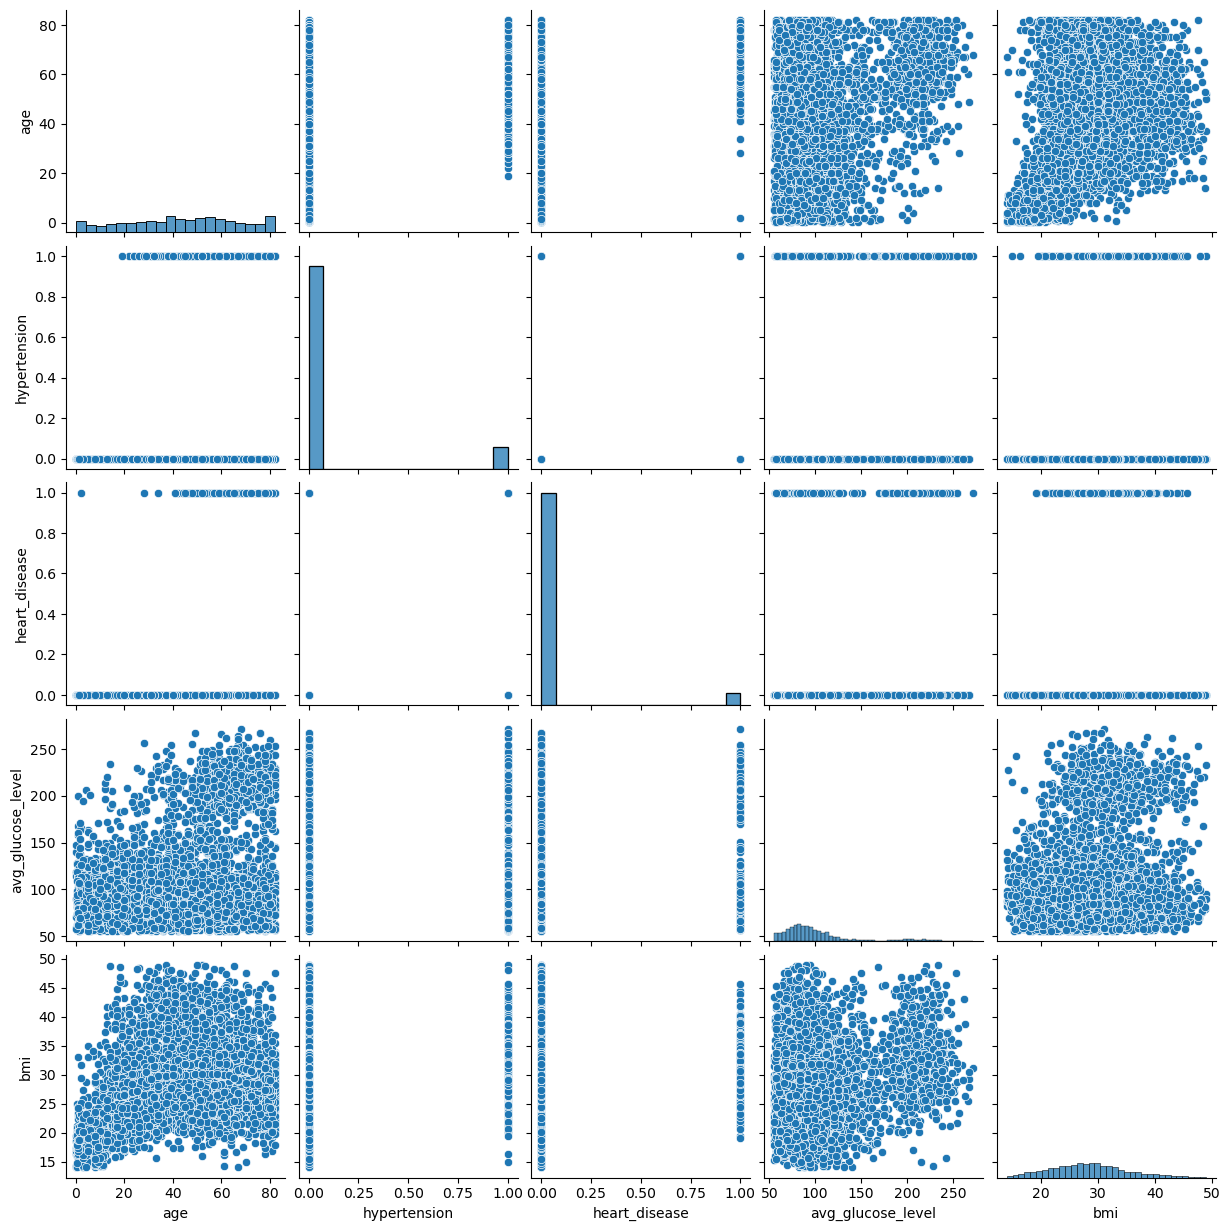

In [18]:
y = df["stroke"].values
x_data = df.drop(["stroke"], axis = 1)
sns.pairplot(x_data)
plt.show()

### Data Normalization

In [19]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.816895,0.0,1.0,0.801265,0.647564
1,0.975586,0.0,1.0,0.234512,0.530086
2,0.597168,0.0,0.0,0.536008,0.584527
3,0.963379,1.0,0.0,0.549349,0.286533
4,0.987793,0.0,0.0,0.605161,0.429799


### Correlation Matrix

In [20]:
df.corr() #calculates the correlation matrix between the numerical columns

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot:>

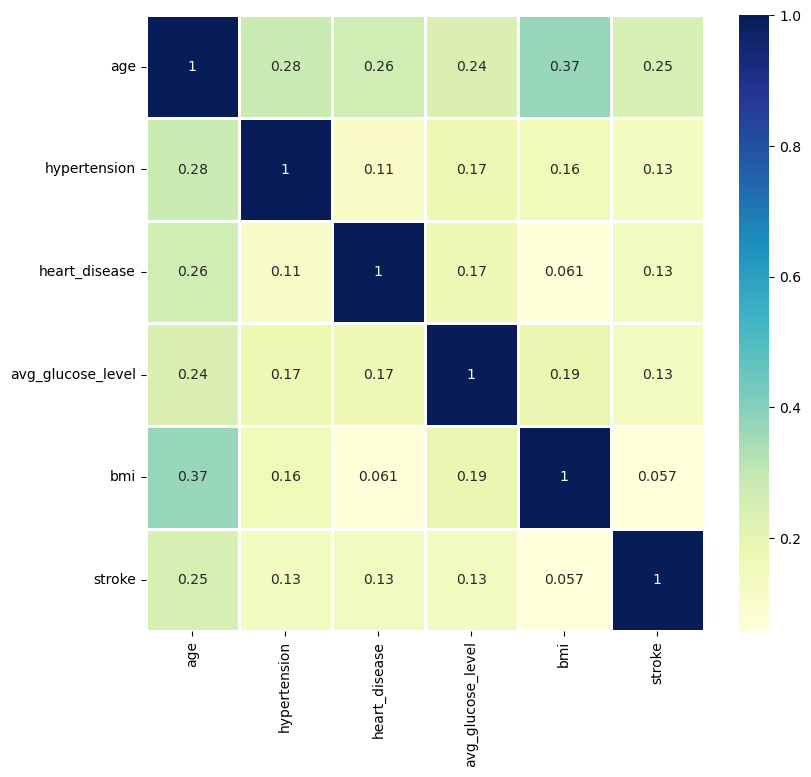

In [21]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

### Spliting the dataset

In [22]:
target = "stroke"
X = df.drop(columns=target)
y = df[target]

### 20% test set & 80% train set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3984, 5)
y_train shape: (3984,)
X_test shape: (997, 5)
y_test shape: (997,)


In [24]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.95


### Building Model

In [25]:
# Build model using Logistic Regression
model = LogisticRegression(max_iter=1000)

# Fit model to training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Predicting the result
y_pred=model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.9458375125376128

In [28]:
# Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
ac = accuracy_score(y_test,y_pred)*100
cr= classification_report(y_test,y_pred)
print("accuracy score : ",ac)
print("classification report :",cr)

accuracy score :  94.58375125376128
classification report :               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



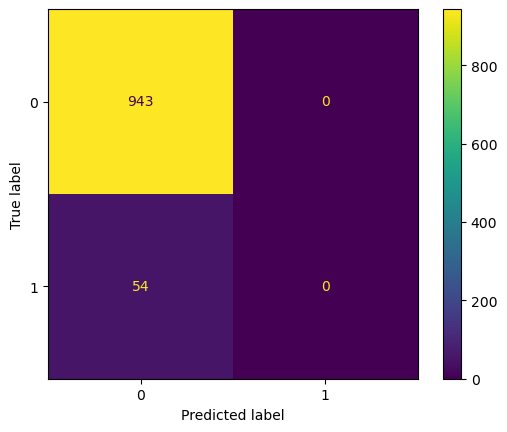

In [29]:
plot_confusion_matrix(model,X_test,y_test)

In [32]:
# Making sample predictions based on manual value entry
age=45
avg_glucose_level=250
bmi=26
gender_Male=1
ever_married_Yes=1
work_type_Never_worked=0	
work_type_Private=1	
work_type_Self_employed=0
work_type_children=0	
Residence_type_Urban=1
smoking_status_formerly_smoked=0
smoking_status_never_smoked=1
smoking_status_smokes=0
hypertension_1=0
heart_disease_1=0
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = model.predict(df)[0]
print("The risk of having brain stroke is:",prediction)


ValueError: 13 columns passed, passed data had 15 columns